In [198]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

Mounted at /content/drive


In [187]:

train_dir='/kaggle/input/severity-costestimation-dataset/data3a/training'

In [189]:
image_size = (224,224)
batch_size = 32

In [190]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.15
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 834 images belonging to 3 classes.


In [191]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 145 images belonging to 3 classes.


In [192]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
base_model = tf.keras.applications.vgg19.VGG19(weights='imagenet', include_top=False)


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)
predictions = Dense(3, activation='softmax')(x)

In [193]:
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
epochs = 20
h=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/20


W0000 00:00:1710090668.165440     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


20/26 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.3991 - loss: 1.8224   

W0000 00:00:1710090692.551127     141 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4148 - loss: 1.8019

W0000 00:00:1710090697.455584     141 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


26/26 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.4170 - loss: 1.7990 - val_accuracy: 0.6094 - val_loss: 1.5674 - learning_rate: 1.0000e-05
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5312 - loss: 1.5891 - val_accuracy: 0.7647 - val_loss: 1.4707 - learning_rate: 1.0000e-05
Epoch 3/20


W0000 00:00:1710090699.761162     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


26/26 ━━━━━━━━━━━━━━━━━━━━ 18s 572ms/step - accuracy: 0.5866 - loss: 1.5491 - val_accuracy: 0.6328 - val_loss: 1.4941 - learning_rate: 1.0000e-05
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5625 - loss: 1.5148 - val_accuracy: 0.6471 - val_loss: 1.4749 - learning_rate: 1.0000e-05
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 17s 562ms/step - accuracy: 0.6340 - loss: 1.5022 - val_accuracy: 0.6641 - val_loss: 1.4253 - learning_rate: 1.0000e-05
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6562 - loss: 1.3335 - val_accuracy: 0.5882 - val_loss: 1.4666 - learning_rate: 1.0000e-05
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 17s 566ms/step - accuracy: 0.6486 - loss: 1.4582 - val_accuracy: 0.6094 - val_loss: 1.4557 - learning_rate: 1.0000e-05
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 1.0633 - val_accuracy: 0.5294 - val_loss: 1.6267 - learning_rate: 1.0000e-05
Epoch 9/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 17s 575ms/step - accuracy: 0.6628 - loss

In [207]:
model.save('/kaggle/working/severity_costestimation_modified.h5')

In [200]:
from tensorflow.keras.preprocessing.image import load_img
image = load_img('/kaggle/input/severity-costestimation-dataset/data3a/training/02-moderate/0004.JPEG', target_size=(224,224,3))

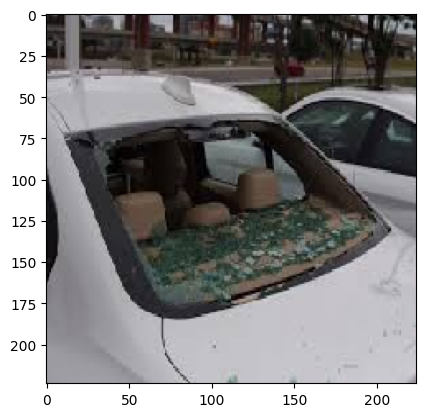

In [201]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [202]:
from tensorflow.keras.preprocessing.image import img_to_array
image = img_to_array(image)
#image=image/255

In [203]:
from tensorflow.keras.applications.vgg16 import preprocess_input
image = preprocess_input(image)

In [204]:
import numpy as np
image=np.expand_dims(image,axis=0)
pred = model.predict(image)
pred_labels=np.argmax(pred,axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step


In [205]:
pred

array([[3.269691e-24, 1.000000e+00, 2.684577e-13]], dtype=float32)

In [206]:
d = {0: 'minor', 1: 'moderate', 2: 'severe'}
for key in d.keys():
    if pred_labels[0] == key:
        print("Validating severity of damage....Result:", d[key])
        map=d[key]
print("Severity assessment complete.")


Validating severity of damage....Result: moderate
Severity assessment complete.


In [ ]:
pred_labels

array([1])

In [ ]:
# Define the dictionary mapping severity levels to cost estimations for each car company
cost_estimations = {
    'minor': {'Toyota': 15000, 'Honda': 14000, 'Ford': 16000, 'Maruti Suzuki': 12000, 'Hyundai': 13000},
    'moderate': {'Toyota': 25000, 'Honda': 24000, 'Ford': 26000, 'Maruti Suzuki': 22000, 'Hyundai': 23000},
    'severe': {'Toyota': 50000, 'Honda': 48000, 'Ford': 52000, 'Maruti Suzuki': 45000, 'Hyundai': 47000}
}


# Assuming pred_label contains the predicted severity level
pred_severity = map  # d is the severity dictionary from the previous code

In [ ]:
pred_severity

'moderate'

In [ ]:
print("Select the car company:")
print("1. Toyota")
print("2. Honda")
print("3. Ford")
print("4. Maruti Suzuki")
print("5. Hyundai")
company_choice = int(input("Enter the number corresponding to the car company: "))

Select the car company:

1. Toyota

2. Honda

3. Ford

4. Maruti Suzuki

5. Hyundai

Enter the number corresponding to the car company: 5


In [ ]:
car_companies = {1: 'Toyota', 2: 'Honda', 3: 'Ford',4: 'Maruti Suzuki',5:'Hyundai'}
selected_company = car_companies.get(company_choice)

# Check if the selected company is valid
if selected_company is None:
    print("Invalid company choice.")
else:
    # Get the cost estimation for the selected company and predicted severity level
    cost = cost_estimations[pred_severity].get(selected_company)
    if cost is not None:
        print(f"Estimated cost of damage for {selected_company}: Ruppees {cost}")
    else:
        print(f"No cost estimation available for {selected_company} at the predicted severity level.")

print("Cost estimation for damage complete.")

Estimated cost of damage for Hyundai: Ruppees23000

Cost estimation for damage complete.
